In [ ]:
!pip install mplcyberpunk
!pip install python-bcb

In [15]:
import mplcyberpunk
import seaborn as sns
import pandas as pd
from bcb import sgs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta

plt.style.use("cyberpunk")

In [16]:
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [17]:
produto_CartaoBeneficio = pd.read_csv('/content/drive/MyDrive/Dados/Produto/produto_cartaobeneficio.csv', sep=';')
produto_CartaoBeneficio['Data'] = pd.to_datetime(produto_CartaoBeneficio['Data'], format='%d/%m/%Y')

In [56]:
produto_CartaoBeneficio.head(15)

,Data,ValorBase
0,2022-06-01,7.015430e+05
1,2022-07-01,8.656982e+05
2,2022-08-01,1.405662e+06
3,2022-09-01,5.317086e+07
4,2022-10-01,2.095832e+07
5,2022-11-01,9.507600e+06
6,2022-12-01,9.602761e+06
7,2023-01-01,7.637462e+06
8,2023-02-01,7.058553e+06
9,2023-03-01,4.412765e+06


In [20]:
produto_CartaoBeneficio['ValorBase'] = produto_CartaoBeneficio['ValorBase'].str.replace(',', '.').astype(float)

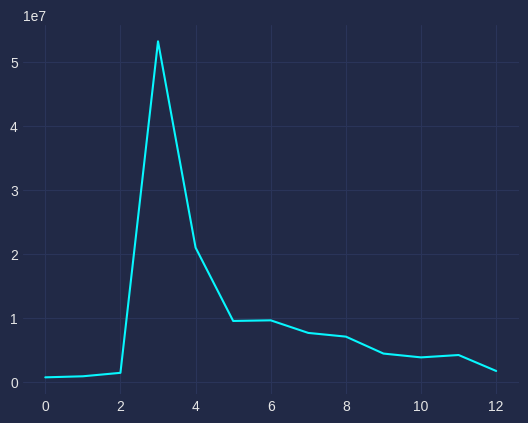

In [21]:
plt.plot(produto_CartaoBeneficio.ValorBase)

In [22]:
produto_CartaoBeneficio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       13 non-null     datetime64[ns]
 1   ValorBase  13 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.0 bytes


In [ ]:
produto_CartaoBeneficio

# PREVISÕES COM ARIMA PRODUTO FGTS

In [47]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(produto_CartaoBeneficio['ValorBase'], order=(3, 1, 1))
arima_fit = arima.fit()

In [48]:
# Calcular o quadrado dos resíduos médios
mse = (arima_fit.resid).mean()
print(mse)

1402900.4042678666


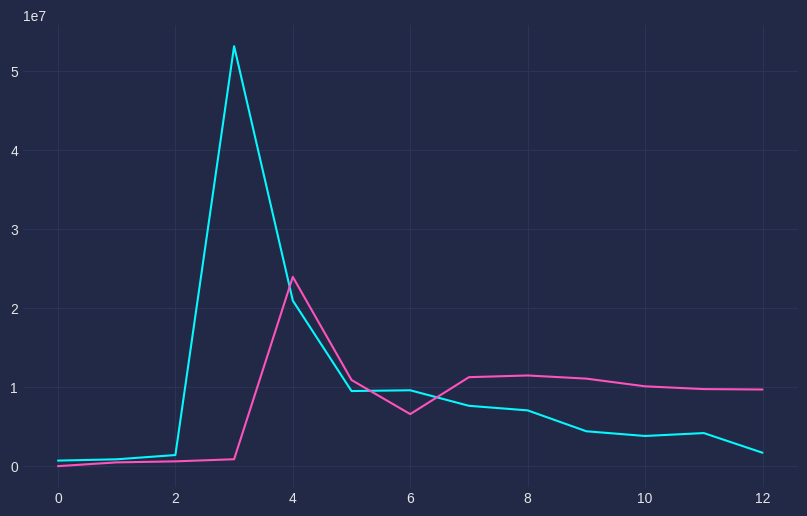

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(produto_CartaoBeneficio.ValorBase)
plt.plot(arima_fit.predict(typ='levels'))

In [50]:
#final da serie historica
produto_CartaoBeneficio.ValorBase.tail(6)

7     7637462.444
8     7058552.981
9     4412765.470
10    3817971.275
11    4186442.498
12    1695826.406
Name: ValorBase, dtype: float64

In [51]:
# RESULTADO ARIMA PARA OS PROXIMOS 6 MESES
previsão = (arima_fit.forecast(steps=6).round())
arima_fit.forecast(steps=6).round()

13     8575522.0
14    10311976.0
15    10217487.0
16     9362991.0
17     9019824.0
18     9041890.0
Name: predicted_mean, dtype: float64

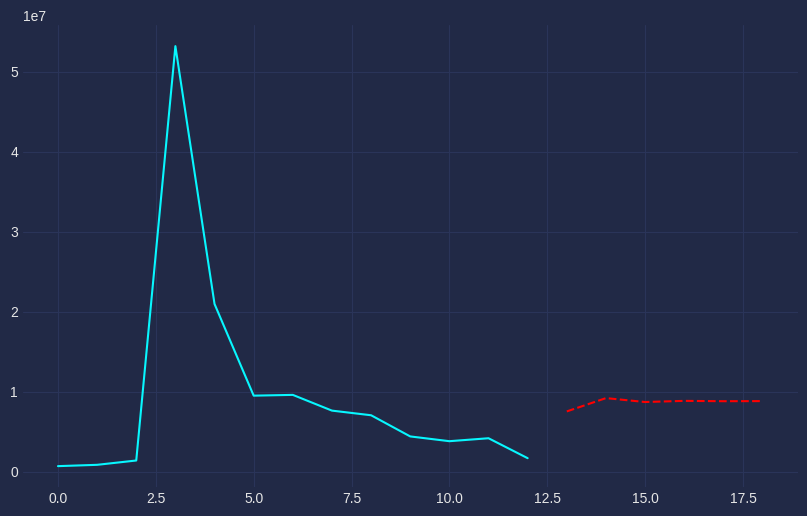

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(produto_CartaoBeneficio.ValorBase)
plt.plot(previsão, color='red', linestyle='--', label='Previsão')